# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

## (2) Sample Data 1

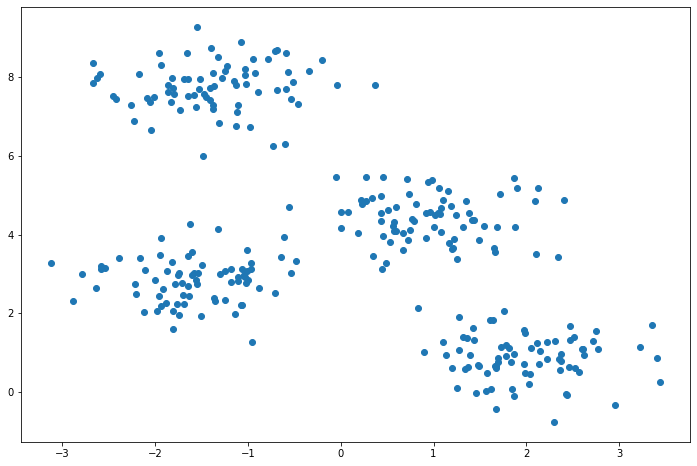

In [4]:
# 데이터 1
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'])
plt.show()

# 2.k-means

### (1) k means 모델 만들기

In [5]:
# k means 모델 만들고 예측하기
model = KMeans(n_clusters= 2, algorithm='auto')
model.fit(x)
pred = model.predict(x)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [6]:
# feature + pred + y 붙여 놓고 비교해 봅시다.
pred = pd.DataFrame(pred, columns = ['predicted'])
result = pd.concat([x, pred, y], axis = 1)
result.head()

,x1,x2,predicted,shape
0,0.836857,2.136359,0,1
1,-1.413658,7.409623,1,3
2,1.155213,5.099619,0,0
3,-1.018616,7.814915,1,3
4,1.271351,1.892542,0,1


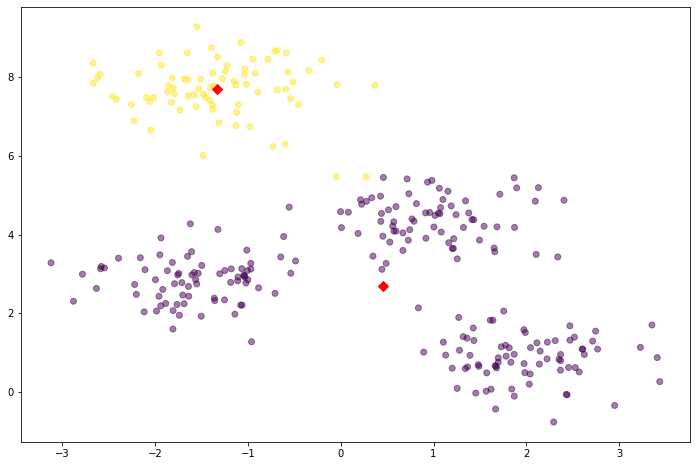

In [7]:
# 결과를 시각화하여 살펴봅시다.

# k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

# scatter plot
plt.figure(figsize = (12,8))
plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
plt.show()


* k 값에 따라 모델을 생성하고 그래프 그리기 함수

In [8]:
def k_means_plot(x, y, k) : 
    model = KMeans(n_clusters= k, algorithm='auto')
    model.fit(x)
    pred = model.predict(x)

    pred = pd.DataFrame(pred, columns = ['predicted'])
    result = pd.concat([x, pred, y], axis = 1)

    # k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
    centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

    # scatter plot
    plt.figure(figsize = (12,8))
    plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
    plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
    plt.show()

## (2) 적절한 K 값 찾기

### 1) k 값을 조절하며 결과를 살펴 봅시다.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


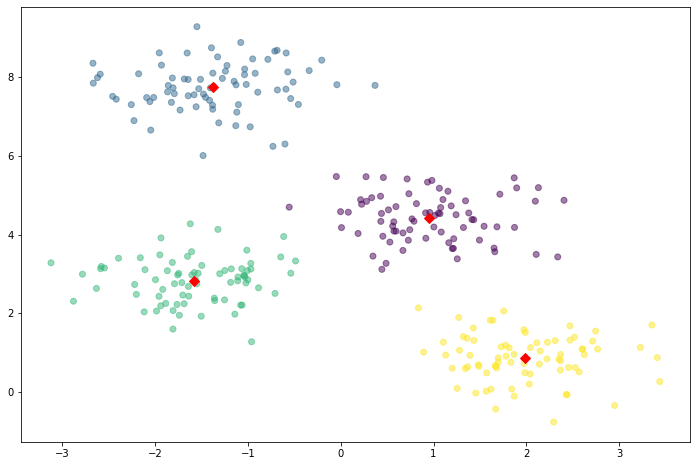

In [18]:
# k 값을 1~8까지 조절해 봅시다.
k_means_plot(x, y, k = 4)

### 2) Inertia 값으로 적정 K 값 찾기

* 눈으로 먼저 보니까 몇개로 군집화 할지 보이지만, 실전에서는 거의 보고 판단할 수 없을 것입니다.
* 그러면 군집의 개수를 어떻게 고를 수 있을까요?

In [19]:
# k means 모델을 생성하게 되면 inertia 값을 확인할 수 있습니다.
model.inertia_

1190.7823593643443

In [20]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1,10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

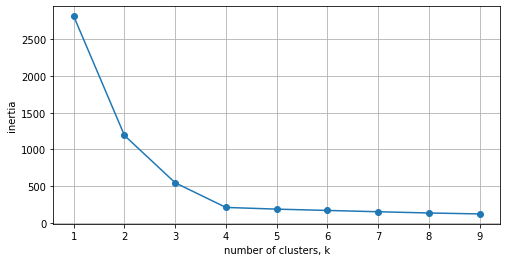

In [22]:
# Plot k vs inertias
plt.figure(figsize = (8,4))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

* 위 결과로 부터 적절한 k 값을 정해 봅시다.

## (3) K-means 한계

### 1) Sample Data 2

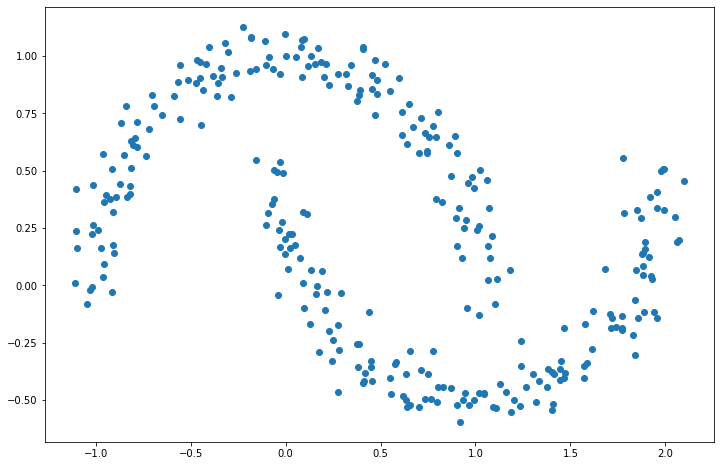

In [23]:
x, y = make_moons(n_samples = 300, noise = .08, random_state=2)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 2) k means 모델 만들기
* k 두개?

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


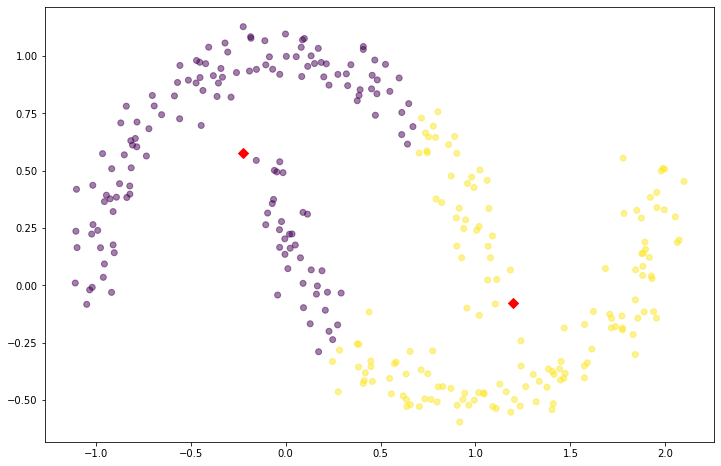

In [27]:
k_means_plot(x, y, k = 2)

### 3) inertia를 이용하여 k값 찾기

In [28]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1,15)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

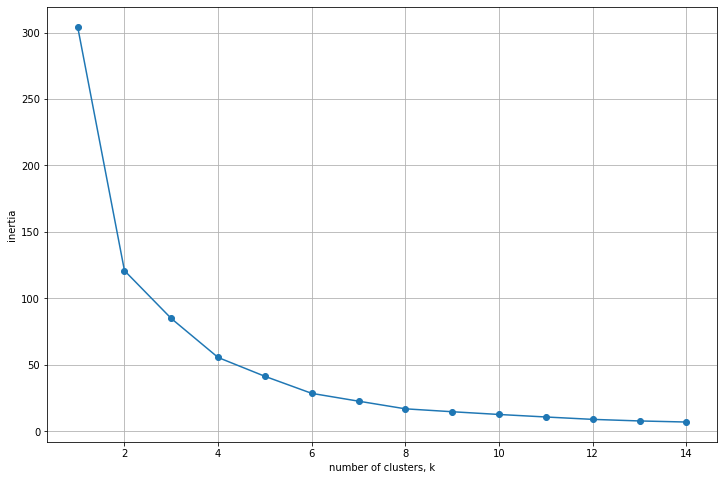

In [29]:
# Plot k vs inertias
plt.figure(figsize = (12,8))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


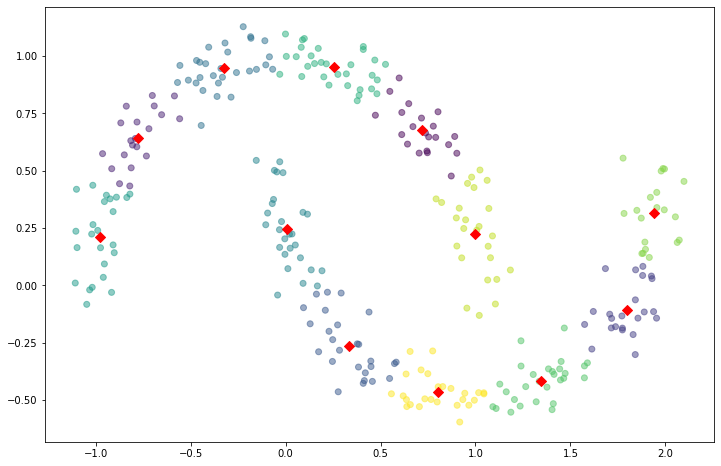

In [32]:
# 적절한 k값으로 모델을 생성해 봅시다.
k_means_plot(x, y, k = 12)

* 우리가 기대하는 바대로 모델이 생성되지 않았습니다.
* k means는 볼록한 덩어리 cluster 구분에서는 괜찮지만, 위와 같은 구조는 사용하기 곤란합니다.

# 3.DBSCAN

## (1) dbscan 모델 만들기

In [ ]:
# DBSCAN 모델을 만들어 봅시다.
model = DBSCAN(eps=0.1, min_samples=3)
model.fit(x)

In [ ]:
# fitting한 후에 모델의 labels_ 값이 찾아낸 군집 종류입니다.
clusters = model.labels_

In [ ]:
# 군집 번호 중 -1은 이상치를 의미합니다.(어느 군집에도 포함 안되는 값들!)
clusters

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
plt.show()

* eps를 적용하며 모델 생성하고 그래프 그리기

In [ ]:
def dbscan_plot(x, y, eps) :
    model = DBSCAN(eps=eps, min_samples=3)
    model.fit(x)
    clusters = model.labels_
    plt.figure(figsize = (12,8))
    plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
    plt.show()

## (2) 적절한 eps 값 찾기 
* 역시 눈으로 보면서 찾는 것은 실전에서는 거의 불가능합니다.
* DBSCAN에도 적절한 값을 찾는 방법이 있습니다.

In [ ]:
# 각점과 근처 5개 점과의 평균 거리
knnDist = NearestNeighbors().fit(x)
distances, _ = knnDist.kneighbors(x)
dist = np.mean(distances[:,1:], axis = 1)
dist = np.sort(dist)

plt.figure(figsize = (12,8))
plt.plot(dist)
plt.grid()
plt.show()

In [ ]:
# 찾아낸 eps 값을 대입시켜 봅시다.

epsilon = 0.125
dbscan_plot(x,y, eps = epsilon)

# 4.이동통신 고객 분석

* 실전에서는 scatter를 그려보면서 할 수 없습니다.
* K means와 DBSCAN 등을 이용하여 고객을 구분해 봅시다.
* (추가) 고객이 어떻게 구분되는지 추가분석을 시도해 봅시다.

## (1) 환경 준비와 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
mobile = pd.read_csv(data_path)

mobile.loc[mobile['CHURN'] == 'LEAVE', 'CHURN'] = 1
mobile.loc[mobile['CHURN'] == 'STAY', 'CHURN'] = 0

In [ ]:
# 무작위로 1000개 샘플링
mobile_s = mobile.sample(1000, random_state=2021)

In [ ]:
mobile_x = mobile_s.drop(['CHURN'],axis = 1)
mobile_y = mobile_s.loc[:, "CHURN"]
col_x = list(mobile_x)

In [ ]:
minmax = MinMaxScaler()
mobile_x = minmax.fit_transform(mobile_x)
mobile_x = pd.DataFrame(mobile_x, columns = col_x)
mobile_x.head()

## (2) k값 찾기

In [ ]:
ks = range(1,50)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mobile_x)
    inertias.append(model.inertia_)

In [ ]:
plt.figure(figsize=(20,8))
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## (2) 모델링

In [ ]:
model = KMeans(n_clusters=5)
model.fit(mobile_x)
pred = model.predict(mobile_x)
pred = pd.DataFrame(pred, columns = ['predict'])

## (3) 결과 살펴보기

In [ ]:
mobile_y.reset_index(inplace=True, drop=True)
result = pd.concat([mobile_x, mobile_y, pred], axis =1)

In [ ]:
result.head()

In [ ]:
result.CHURN = result.CHURN.astype('int')

* 클러스터 별 고객이탈율

In [ ]:
result.groupby('predict')['CHURN'].mean()

In [ ]:
# 전체 평균
result['CHURN'].value_counts() / result.shape[0]